In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv


# Analysis of Novel Corona Virus 2019 (COVID-19) Dataset


### Objective
We would like to analyse the impact of COVID-19 on different countries across the world. By understanding the historical information and current numbers of confirmed, death, recovered cases, we can assess the growth rate of COVID-19 across different countries and determine whether the spread of COVID-19 is slowing or increasing in specific countries. We would like to predict the future rate of spread and number of deaths using various time series models.   

---

### Context
From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.

So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.

Johns Hopkins University has made an excellent dashboard using the affected cases data. This data is extracted from the same link and made available in csv format.

---

### Content
2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

Data at individual level obtained from the below two sources

- https://docs.google.com/spreadsheets/d/1itaohdPiAeniCXNlntNztZ_oRvjh0HsGuJXUJWET008/edit#gid=0
- https://docs.google.com/spreadsheets/d/e/2PACX-1vQU0SIALScXx8VXDX7yKNKWWPKE1YjFlWc6VTEVSN45CklWWf-uWmprQIyLtoPDA18tX9cFDr-aQ9S6/pubhtml


---

### Acknowledgements
Johns Hopkins university has made the data available in google sheets format here. Sincere thanks to them.

Thanks to WHO, CDC, NHC and DXY for making the data available in first place.

### Table of Contents

* [ Exploratory Data Analysis and Data Processing ](#EDA)

* [ Visualization of global map for COVID-19 cases](#map)

* [ Prediction of the spread of COVID-19 across countries with ARIMA](#predict)


In [2]:
# Run this code for the first time, to install the libraries
# import sys
# !{sys.executable} -m pip install folium
# !{sys.executable} -m pip install plotly

In [3]:
import pandas as pd
import numpy as np


# remove unnecessary columns
df = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
df = df.drop(['SNo','Last Update'], axis=1)
df.ObservationDate = df.ObservationDate.apply(pd.to_datetime)
df.sort_values(by='ObservationDate',ascending=False)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
5631,2020-03-14,NaN,occupied Palestinian territory,0.0,0.0,0.0
5461,2020-03-14,Xinjiang,Mainland China,76.0,3.0,73.0
5474,2020-03-14,NaN,Luxembourg,51.0,1.0,0.0
5473,2020-03-14,NaN,Vietnam,53.0,0.0,16.0
5472,2020-03-14,NaN,Taiwan,53.0,1.0,20.0
...,...,...,...,...,...,...
25,2020-01-22,Shanghai,Mainland China,9.0,0.0,0.0
24,2020-01-22,Shandong,Mainland China,2.0,0.0,0.0
23,2020-01-22,Shaanxi,Mainland China,0.0,0.0,0.0
22,2020-01-22,Qinghai,Mainland China,0.0,0.0,0.0


In [4]:
df.ObservationDate.unique()  # timeframe is from 22nd Jan to 25th Feb with no missing days
df.ObservationDate.isnull().any()  # no missing values for Observation date

df[['Confirmed','Deaths','Recovered']].isnull().any()  # no missing values for ['Confirmed','Deaths','Recovered']
df['Country/Region'].isnull().any()  # no missing values for Country/Region

df['Province/State'].isnull().any()  # missing values for Province/State

True

In [5]:
df[df['Confirmed'] < 0 ]  # no invalid / negative cases
df[df['Deaths'] < 0 ]  # no invalid / negative values
df[df['Recovered'] < 0 ]  # no invalid / negative values


# rename countries and provinces
df["Country/Region"].replace({"Iran (Islamic Republic of)": "Iran", "Viet Nam":"Vietnam"}, inplace=True)

df[df['Province/State'].isnull()]['Country/Region'].unique()  # list of countries without provinces/state

array(['Japan', 'Thailand', 'South Korea', 'Singapore', 'Philippines',
       'Malaysia', 'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia',
       'France', 'Nepal', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Finland', 'United Arab Emirates', 'India', 'Italy', 'UK',
       'Russia', 'Sweden', 'Germany', 'Spain', 'Belgium', 'Egypt', 'Iran',
       'Lebanon', 'Oman', 'Afghanistan', 'Bahrain', 'Iraq', 'Kuwait',
       'Algeria', 'Croatia', 'Switzerland', 'Austria', 'Israel',
       'Pakistan', 'Georgia', 'Greece', 'North Macedonia', 'Norway',
       'Romania', 'Denmark', 'Estonia', 'Netherlands', 'San Marino',
       ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania', 'New Zealand',
       'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg', 'Monaco',
       'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Uk

In [6]:
df['Country/Region'].replace({"Taipei and environs": "Taiwan"}, inplace=True)
df[~df['Province/State'].isnull()]['Country/Region'].unique() # list of countries with provinces/state
# the 2 lists of countries with and without provinces/state are mutually exclusive. No incorrect entries or errors in country names

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Canada',
       'Australia', 'Germany', 'Others', 'Israel', 'Lebanon', 'Iraq',
       'Austria', 'France', 'UK', 'Denmark'], dtype=object)

In [7]:
df.groupby(['Country/Region','Province/State']).size()  # list of provinces for each country

Country/Region  Province/State              
Australia       Australian Capital Territory     2
                Diamond Princess cruise ship     5
                From Diamond Princess           18
                New South Wales                 48
                Northern Territory              11
                                                ..
US              Westchester County, NY           7
                Williamson County, TN            5
                Wisconsin                        5
                Wyoming                          5
                Yolo County, CA                  4
Length: 268, dtype: int64

<a name="EDA"></a>
### Exploratory Data Analysis

We would first like to understand the number of confirmed / deaths / recovered cases to assess the global and local impact of COVID-19. We also like to identify the factors that influence the spread of COVID-19 and specific demographics have a high frequency or high growth rate of COVID-19.

Data processing steps: 
- Check for missing values in confirmed / deaths / recovered cases
- Check for missing values or errors in Country / Province / Date formating
- Check for invalid values in confirmed / deaths / recovered cases

Some questions we would like to investigate:
- What is the global growth rate in terms of confirmed / deaths / recovered cases?
- What are the countries with the most number of confirmed / deaths / recovered cases?
- What are the countries with the fastest rate of growth for confirmed cases?
- What are the countries with the highest rate of mortality? Are these countries well-equipped to tackle the spread of COVID-19?
- What is the rate of spread to different countries (based on first confirmed cases in countries)?  
- World map visualization in terms of confirmed cases around the world.
- Correlations of spread of COVID-19 between countries

In [8]:
import plotly.graph_objects as go

global_df = df.groupby('ObservationDate').sum()
global_df['mortality rate'] = round(global_df['Deaths'] / global_df['Confirmed'],4)*100
fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Scatter(x=global_df.index, 
                         y=global_df['mortality rate'],
                         mode='lines+markers',
                         name='Mortality Rate',
                         line=dict(color='red', width=2)))


fig.update_layout(
    title="Global Mortality Rate",
    xaxis_title="Mortality Rate",
    yaxis_title="Date",
    font=dict(
        family="Arial",
        size=16,
        color="white"
    ))

    
fig.show()

In [9]:
global_df = df.groupby('ObservationDate').sum()
fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Scatter(x=global_df.index, 
                         y=global_df['Deaths'],
                         mode='lines+markers',
                         name='Deaths',
                         line=dict(color='red', width=2)))
fig.add_trace(go.Scatter(x=global_df.index, 
                         y=global_df['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=global_df.index, 
                         y=global_df['Recovered'],
                         mode='lines+markers',
                         name='Recovered',
                         line=dict(color='green', width=2)))

fig.update_layout(
    title="Global Number of Confirmed/Death/Recovered cases",
    xaxis_title="Number of cases",
    yaxis_title="Date",
    font=dict(
        family="Arial",
        size=16,
        color="white"
    ))
fig.show()

In [10]:
latest_df = df[df.ObservationDate == '2020-03-10']
country_df = latest_df.groupby('Country/Region').sum()
fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Bar(
    y=country_df.index,
    x=country_df.Confirmed,
    name='Confirmed',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=country_df.index,
    x=country_df.Deaths,
    name='Deaths',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack')
fig.update_layout(
    title="Number of Confirmed/Death/Recovered cases for each country",
    yaxis_title="Country names",
    xaxis_title="Number of cases",
    font=dict(
        family="Arial",
        size=10,
        color="white"
    ))
fig.show()

In [11]:
latest_df = df[(df.ObservationDate == '2020-03-10') & (df['Country/Region'] == 'Mainland China')]
latest_df = latest_df.groupby('Province/State').sum()

fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Bar(
    y=latest_df.index,
    x=latest_df.Confirmed,
    name='Confirmed',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=latest_df.index,
    x=latest_df.Deaths,
    name='Deaths',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack')
fig.update_layout(
    title="Number of Confirmed/Death/Recovered cases in various provinces across China",
    yaxis_title="Province names",
    xaxis_title="Number of cases",
    font=dict(
        family="Arial",
        size=12,
        color="white"
    ))
fig.show()

In [12]:
country_unique_df = df.groupby('ObservationDate')['Country/Region'].nunique()
country_unique_df = pd.DataFrame({'ObservationDate':country_unique_df.index, 'Country Number':country_unique_df.values})
country_unique_df


fig = go.Figure()
fig.update_layout(template='plotly_dark')
fig.add_trace(go.Scatter(x=country_unique_df.ObservationDate, 
                         y=country_unique_df['Country Number'],
                         mode='lines+markers',
                         name='Number of unique countries infected with COVID-19',
                         line=dict(color='red', width=2)))


fig.update_layout(
    title="Number of unique countries infected with COVID-19",
    yaxis_title="Number of Countries",
    xaxis_title="Date",
    font=dict(
        family="Arial",
        size=16,
        color="white"
    ))
fig.show()

In [13]:
import folium
from folium import plugins

confirmed_df = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
confirmed_df
latest_confirmed_df = confirmed_df[['Province/State', 'Country/Region', 'Lat', 'Long', '3/10/20']]

m = folium.Map(location=[10, -20], zoom_start=2.6)
use_colours = ['orange','#d6604d','#b2182b','#67001f']

for lat, lon, value, country, province in zip(latest_confirmed_df['Lat'], latest_confirmed_df['Long'], latest_confirmed_df['3/10/20'], latest_confirmed_df['Country/Region'], latest_confirmed_df['Province/State']):
    if not province:
        popup = ('<strong>Country</strong>: ' + str(country).capitalize() + '<br>' '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>')
    else:
        popup = ('<strong>Country</strong>: ' + str(country).capitalize() + '<br>' '<strong>Province</strong>: ' + str(province).capitalize() + '<br>' '<strong>Confirmed Cases</strong>: ' + str(value) + '<br>')        
    if value >= 5000:
        color = use_colours[3]
    elif value >= 1000:
        color = use_colours[2]
    elif value >= 500:
        color = use_colours[1]
    else:
        color = use_colours[0]
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = popup,
                        color=color,
                        fill_color=color,
                        fill_opacity=0.7 ).add_to(m)
minimap = plugins.MiniMap()
m.add_child(minimap)
m

In [14]:
confirmed_df = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
date_list = list(confirmed_df.columns)[4:]
final_date_list = []
for i in date_list:
    k = i.split('/')
    if len(k[1])==1:
        final_date_list.append('2020' + '-' + '0' + k[0] + '-' + '0' + k[1])
    else:
        final_date_list.append('2020' + '-' + '0' + k[0] + '-' + k[1])

final_date_list = ['Province/State','Country/Region','Lat', 'Long'] + final_date_list
confirmed_df.columns = final_date_list
confirmed_df

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<a name="arima"></a>

### Using Time Series based models: ARIMA

Assumptions of ARIMA model:

- The dataset is time dependent and univariate.
- The dataset should be stationary: constant mean, variance and autocovariance that is time independent.
- The model parameters are constant over time
- The error process is homoscedastic (constant) over time. (Residuals are uncorrelated and normally distributed)

In [15]:
from datetime import datetime
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf

In [16]:
confirmed_df = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
confirmed_df = confirmed_df.drop(labels=['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
confirmed_df = confirmed_df.T
confirmed_df['confirmed'] = confirmed_df.sum(axis=1)
confirmed_df = confirmed_df['confirmed']

train_size = int(len(confirmed_df) * 0.85)
train, test = confirmed_df[0:train_size], confirmed_df[train_size:]
# test size: 7 days (3rd March to 10th March 2020)

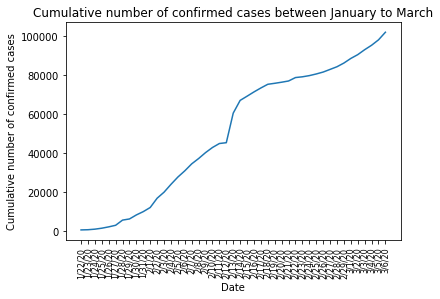

In [17]:
plt.plot(train)
plt.xlabel('Date')
plt.ylabel('Cumulative number of confirmed cases')
plt.xticks(fontsize=8, rotation=90)
plt.title('Cumulative number of confirmed cases between January to March')
plt.show()

In [18]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.xticks(fontsize=10, rotation=90)
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

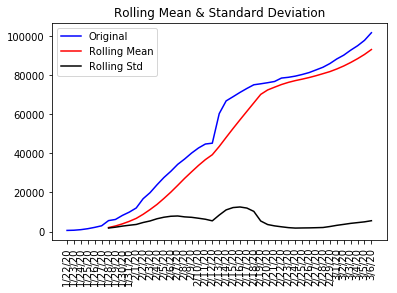

In [19]:
test_stationarity(train)
# Since this dataset has a cumulative number of confirmed cases,
# both Rolling Mean and Rolling Standard Deviation are not constant.
# Hence dataset is not stationary

In [20]:
def difference(dataset, interval=1):
    index = list(dataset.index)
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset.values[i] - dataset.values[i - interval]
        diff.append(value)
    return (diff)

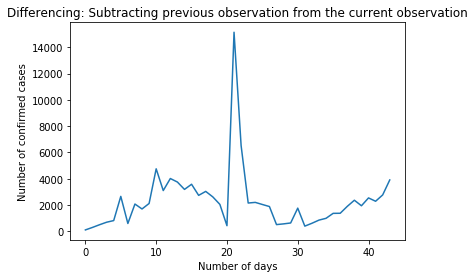

In [21]:
# Difference will remove the cumulative number of confirmed cases and only present the number of confirmed cases pe
diff = difference(train)

plt.plot(diff)
plt.xlabel('Number of days')
plt.ylabel('Number of confirmed cases')
plt.title('Differencing: Subtracting previous observation from the current observation')
plt.show()
# Differencing is a popular and widely used data transform for making time series data stationary.
# Differencing is performed by subtracting the previous observation from the current observation.

In [22]:
X = diff
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# We carry out Dickey-Fuller test, to test for stationarity in the dataset. 
# The results show that te test static value -4.56 is smaller than the critical value at 5% of -2.939
# We can reject null hypothesis and conclude that differenced series is stationary.
# At least one level of differencing is required.

ADF Statistic: -4.766531
p-value: 0.000063
Critical Values:
	1%: -3.593
	5%: -2.932
	10%: -2.604


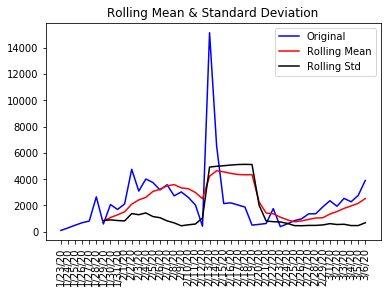

In [23]:
diff = difference(train)
diff_df = pd.DataFrame(diff)
train1 = pd.DataFrame(train)
train1['date'] = train1.index
diff_df.index = train1.date[1:]
diff_df

test_stationarity(diff_df)
# Since this dataset has a cumulative number of confirmed cases,
# both Rolling Mean and Rolling Standard Deviation are not constant.
# Hence dataset is not stationary

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



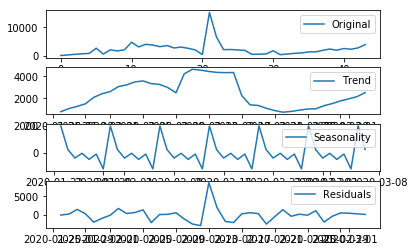

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
diff = difference(train)
diff_df = pd.DataFrame(diff)
train1 = pd.DataFrame(train)
train1['date'] = train1.index
diff_df.index = train1.date[1:]

diff_df1 = pd.DataFrame(diff_df)
diff_df1.reset_index(inplace=True)
diff_df1['date'] = pd.to_datetime(diff_df1['date'])
diff_df1.index = diff_df1['date']
diff_df1 = diff_df1.drop(columns=['date'],axis=1)


decomposition = seasonal_decompose(diff_df1)


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.show()

# taking the differenced dataset, there is still some trends of seasonality

#### Autocorrelation Function (ACF)

It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).

#### Partial Autocorrelation Function (PACF)

This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



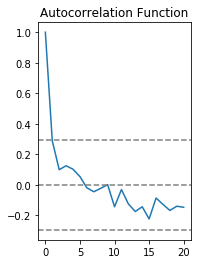

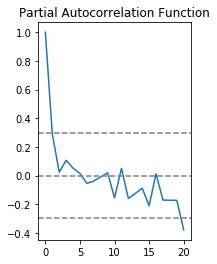

<Figure size 432x288 with 0 Axes>

In [25]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(diff, nlags=20)
lag_pacf = pacf(diff, nlags=20, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()
plt.tight_layout()

In [26]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
diff = difference(train)
diff_df = pd.DataFrame(diff)

p_values = range(0,8)
d_values = range(0, 4)
q_values = range(0, 8)
warnings.filterwarnings("ignore")
evaluate_models(diff_df.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1481.462
ARIMA(0, 0, 1) RMSE=1355.869
ARIMA(0, 1, 0) RMSE=2308.131
ARIMA(0, 1, 1) RMSE=2180.861
ARIMA(0, 2, 0) RMSE=5399.596
ARIMA(0, 2, 1) RMSE=2550.538
ARIMA(1, 0, 0) RMSE=1378.198
ARIMA(1, 1, 0) RMSE=2699.110
ARIMA(1, 2, 0) RMSE=5239.188
Best ARIMA(0, 0, 1) RMSE=1355.869


In [27]:
# evaluate an ARIMA model for a given order (p,d,q) and return AIC
def evaluate_arima_model_aic(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    return model_fit.aic

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models_aic(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    aic = evaluate_arima_model(dataset, order)
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order,aic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))

# evaluate parameters
diff = difference(train)
diff_df = pd.DataFrame(diff)

p_values = range(0,8)
d_values = range(0, 4)
q_values = range(0, 8)
warnings.filterwarnings("ignore")
evaluate_models_aic(diff_df.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) AIC=1481.462
ARIMA(0, 0, 1) AIC=1355.869
ARIMA(0, 1, 0) AIC=2308.131
ARIMA(0, 1, 1) AIC=2180.861
ARIMA(0, 2, 0) AIC=5399.596
ARIMA(0, 2, 1) AIC=2550.538
ARIMA(1, 0, 0) AIC=1378.198
ARIMA(1, 1, 0) AIC=2699.110
ARIMA(1, 2, 0) AIC=5239.188
Best ARIMA(0, 0, 1) AIC=1355.869


In [28]:
best_cfg = (0, 0, 0)
history = [float(x) for x in diff_df.values]
model = ARIMA(history, order=best_cfg)
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   44
Model:                     ARMA(0, 0)   Log Likelihood                -404.305
Method:                           css   S.D. of innovations           2368.040
Date:                Sun, 15 Mar 2020   AIC                            812.611
Time:                        12:16:29   BIC                            816.179
Sample:                             0   HQIC                           813.934
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2300.6591    356.995      6.445      0.000    1600.961    3000.357


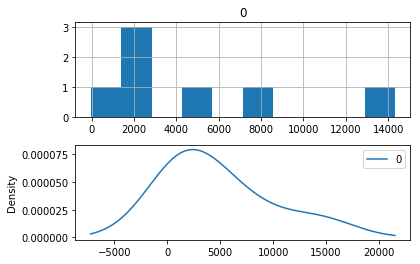

In [29]:
diff_test = difference(test)
diff_df_test = pd.DataFrame(diff_test)
test1 = pd.DataFrame(test)
test1['date'] = test1.index
diff_df_test.index = test1.date[1:]
diff_df_test


# walk-forward validation
best_cfg = (0, 0, 0)
history = [float(x) for x in diff_df.values]
predictions = list()
for i in range(len(diff_df_test)):
    # predict
    model = ARIMA(history, order=best_cfg)
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = diff_df_test.values[i]
    history.append(obs)
# errors
residuals = [diff_df_test.values[i]-predictions[i] for i in range(len(diff_df_test))]
residuals = pd.DataFrame(residuals)
plt.figure()
plt.subplot(211)
residuals.hist(ax=plt.gca())
plt.subplot(212)
residuals.plot(kind='kde', ax=plt.gca())
plt.show()

In [30]:
from statsmodels.tsa.arima_model import ARIMAResults
from scipy.stats import boxcox
from sklearn.metrics import mean_squared_error
from math import exp
from math import log
import numpy

history = [float(x) for x in diff_df.values]
# predict

def invert_difference(test, diff):
    pred = list()
    value = test[0]
    for i in range(0, len(diff)):
        value += float(diff.values[i])
        pred.append(value)
    return numpy.array(pred)


model = ARIMA(history, order=(0,0,0))
model_fit = model.fit()

yhat = model_fit.forecast(steps=1)[0]
yhat = yhat + test.values[0]
print('Predicted next day volume on 3rd March = %i' % (yhat))

Predicted next day volume on 3rd March = 108121
